In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM


# Dataset


In [2]:
# No splits for train/dev/test will be created as this is not supervised learning and we are not given labels.
df = pd.read_csv("hw4_dataset.csv")
df.head()
# since its already numeric,
X = df.values

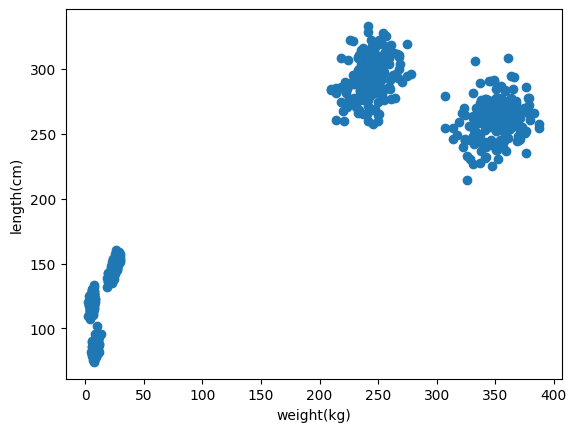

In [3]:
plt.scatter(df["weight"], df["length"])
plt.xlabel("weight(kg)")
plt.ylabel("length(cm)")
plt.show()

#K-Means

In [4]:
class KMeanscluster:
  def __init__(self, k, max_iter = 100):
    self.k = k # determines the number of clusters.
    self.max_iter = max_iter
    self.centroids = None # storing centroids

  def fit(self, X):
    # choose starting centroid randomly based on index of rows in X.
    # Chooses k distinct rows from X. Replace = False ensures no duplicates.
    index = np.random.choice(len(X), self.k, replace = False)
    # Stores the specified rows from X.
    self.centroids = X[index]

    # trains for max_iter
    for i in range(self.max_iter):
      # assigns each point to nearest centroid
      assignments = self._asign_points(X)
      # finds new centorids
      new_centroids = self._update_centroids(X, assignments)

      # The loop breaks if the centroid does not change/converge
      if np.allclose(self.centroids, new_centroids):
        break
      # update the centroid
      self.centroids = new_centroids

  def _asign_points(self, X):
    # calculates distance.
    # Adds an axis to X. Shape is (n_samples, 1, n_features)
    expanded_X = X[:, None]

    # Subtracts centroid from each point.
    diff = expanded_X - self.centroids

    # Computes Euclidean distance for each (poin, centroid) pair.
    # shape is (n_samples, k)
    distances = np.linalg.norm(diff, axis = 2)

    # get the closet centroid and return it
    assignments = np.argmin(distances, axis = 1)
    return assignments

  def _update_centroids(self, X, assignments):
    new_centroids = []

    for j in range(self.k):

      # select all points assigned to cluster j
      cluster_points = X[assignments == j]
      if len(cluster_points) > 0:
        # Compute mean
        # The mean is now the new centroid
        new_centroid = cluster_points.mean(axis = 0)
      else:
        # if a cluster has no points, reintialize it randomly using X.
        index = np.random.choice(len(X))
        new_centroid = X[index]
      new_centroids.append(new_centroid)

    return np.array(new_centroids)

  def predict(self, X):
    return self._asign_points(X)


In [5]:
iters_list = [5, 10, 50, 100, 200]
k_list = [2, 3, 4]

for iter_count in iters_list:
    for k_val in k_list:
        KMeans_c = KMeanscluster(k=k_val, max_iter=iter_count)
        KMeans_c.fit(X)
        clusters = KMeans_c.predict(X)

        # stores in a unique column name
        col_name = f'cluster_k{k_val}_iter{iter_count}'
        df[col_name] = clusters

# check the DataFrame once
df.head()


,weight,length,cluster_k2_iter5,cluster_k3_iter5,cluster_k4_iter5,cluster_k2_iter10,cluster_k3_iter10,cluster_k4_iter10,cluster_k2_iter50,cluster_k3_iter50,cluster_k4_iter50,cluster_k2_iter100,cluster_k3_iter100,cluster_k4_iter100,cluster_k2_iter200,cluster_k3_iter200,cluster_k4_iter200
0,7.643140,84.411360,0,2,0,0,1,2,1,1,1,0,2,0,1,1,0
1,338.079325,259.918982,1,1,1,1,0,0,0,0,0,1,1,3,0,0,2
2,347.303709,225.203959,1,1,1,1,0,0,0,0,0,1,1,3,0,0,2
3,6.758873,87.143065,0,2,0,0,1,2,1,1,1,0,2,0,1,1,0
4,25.330695,145.428500,0,2,0,0,1,1,1,2,2,0,0,1,1,2,1


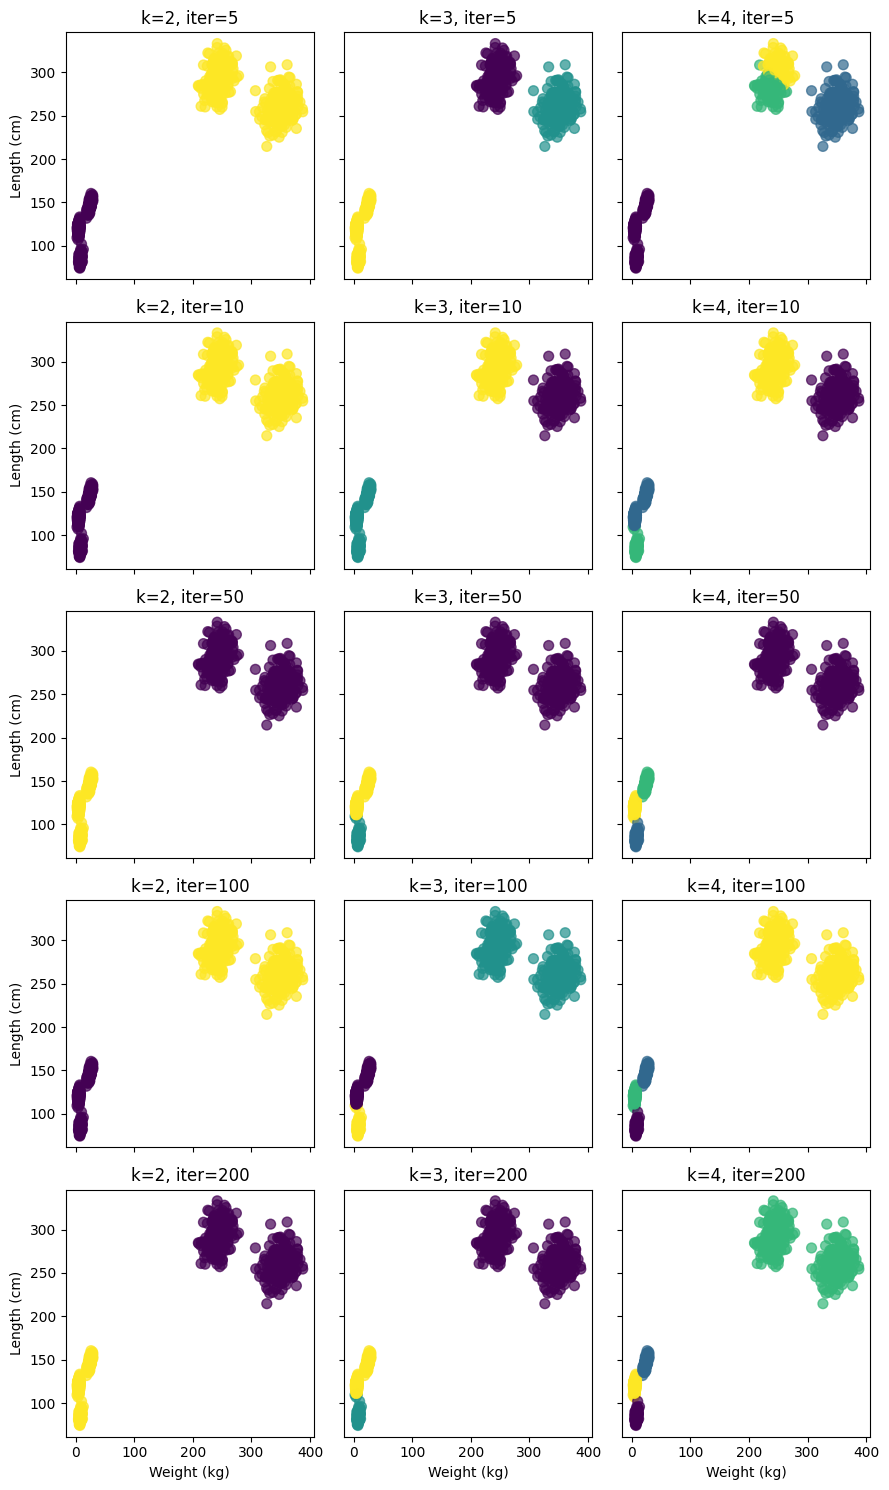

In [6]:
# visualizing kmeans



n_rows = len(iters_list)
n_cols = len(k_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows), sharex=True, sharey=True)
for i, iter_count in enumerate(iters_list):
    for j, k_val in enumerate(k_list):
        col_name = f'cluster_k{k_val}_iter{iter_count}'
        ax = axes[i, j]
        scatter = ax.scatter(df['weight'], df['length'], c=df[col_name], cmap='viridis', s=50, alpha=0.7)
        ax.set_title(f'k={k_val}, iter={iter_count}')
        if i == n_rows-1:
            ax.set_xlabel('Weight (kg)')
        if j == 0:
            ax.set_ylabel('Length (cm)')

plt.tight_layout()
plt.show()

# Sklearn - Kmeans

In [7]:
# check the DataFrame once
df.head()
for iter_count in iters_list:
    for k_val in k_list:
        KM = KMeans(n_clusters=k_val, max_iter=iter_count, random_state=42)
        KM.fit(X)
        clusters = KM.predict(X)

        # store in unique column
        col_name = f'skl_k{k_val}_iter{iter_count}'
        df[col_name] = clusters

df.head()



,weight,length,cluster_k2_iter5,cluster_k3_iter5,cluster_k4_iter5,cluster_k2_iter10,cluster_k3_iter10,cluster_k4_iter10,cluster_k2_iter50,cluster_k3_iter50,...,skl_k4_iter10,skl_k2_iter50,skl_k3_iter50,skl_k4_iter50,skl_k2_iter100,skl_k3_iter100,skl_k4_iter100,skl_k2_iter200,skl_k3_iter200,skl_k4_iter200
0,7.643140,84.411360,0,2,0,0,1,2,1,1,...,3,0,0,3,0,0,3,0,0,3
1,338.079325,259.918982,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,347.303709,225.203959,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,6.758873,87.143065,0,2,0,0,1,2,1,1,...,3,0,0,3,0,0,3,0,0,3
4,25.330695,145.428500,0,2,0,0,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0


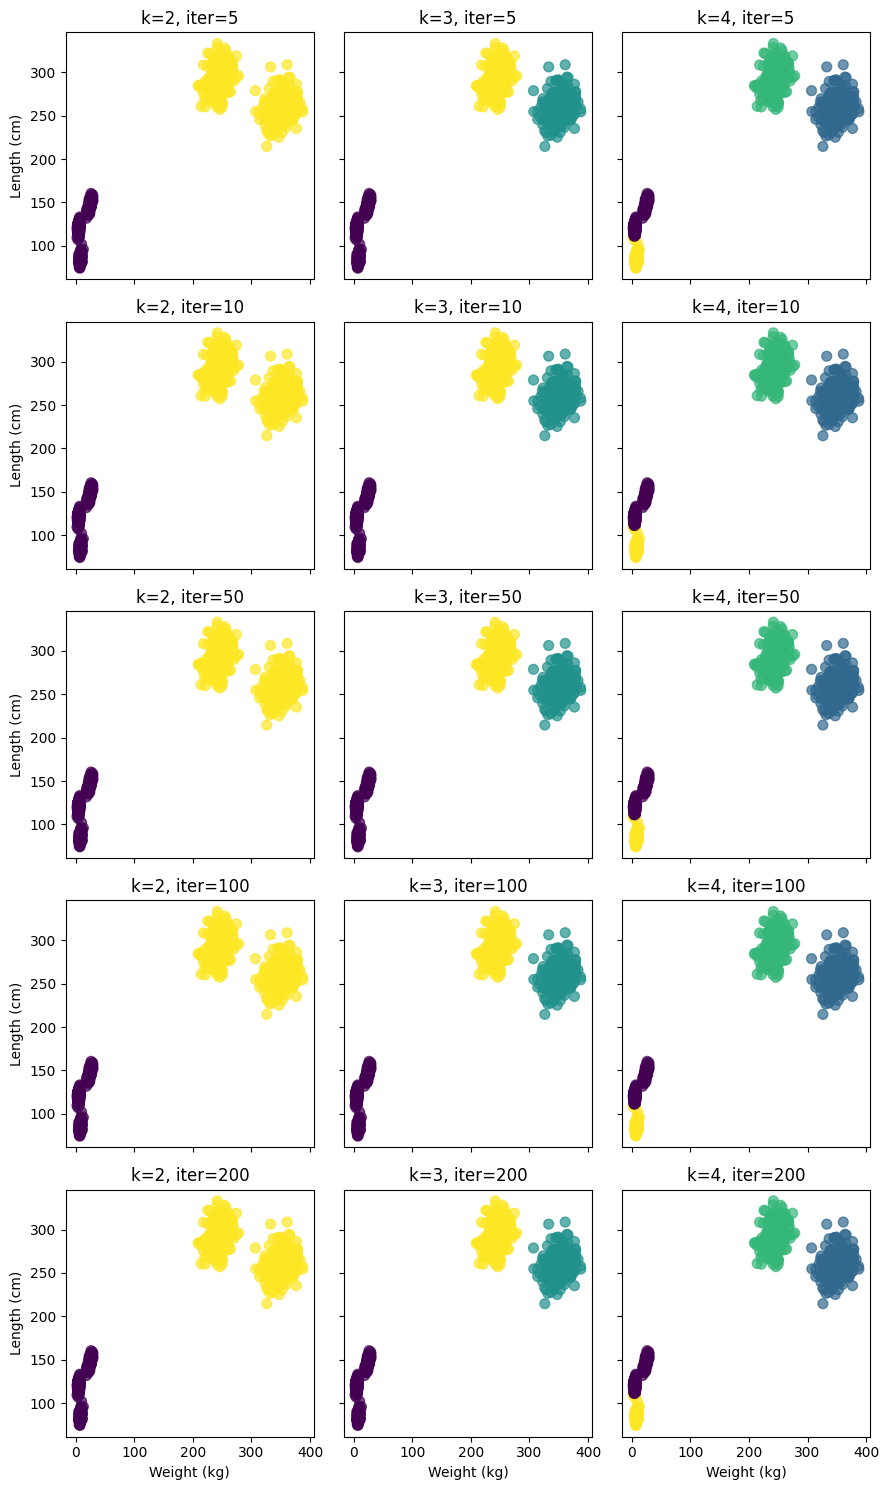

In [8]:
fig, axes = plt.subplots(len(iters_list), len(k_list), figsize=(3*len(k_list), 3*len(iters_list)), sharex=True, sharey=True)

for i, iter_count in enumerate(iters_list):
    for j, k_val in enumerate(k_list):
        col_name = f'skl_k{k_val}_iter{iter_count}'
        ax = axes[i, j]
        ax.scatter(df['weight'], df['length'], c=df[col_name], cmap='viridis', s=50, alpha=0.7)
        ax.set_title(f'k={k_val}, iter={iter_count}')
        if i == len(iters_list)-1:
            ax.set_xlabel('Weight (kg)')
        if j == 0:
            ax.set_ylabel('Length (cm)')

plt.tight_layout()
plt.show()


# Gaussian Mixture Model (GMM) clustering




In [9]:
# implementing gussian mixter model clustering algorithm.
class GMMcluster:
  def __init__(self, n_components = 3, max_iter = 100, tol = 1e-4, mean = None, covariances = None, weights = None ):
    self.n_components = n_components
    self.max_iter = max_iter
    self.tol = tol
    self.mean = mean
    self.covariances = covariances
    self.weights = weights

  def _gaussian_pdf(self, X, mean, cov):
    n_samples, n_features = X.shape

    # determint of covariance
    cov_det = np.linalg.det(cov)

    # inverse of covarience
    cov_inv = np.linalg.inv(cov)

    # subtracts the mean from each point
    diff = X-mean

    # this computs the Mahalanobis distance squared
    # the ij,jk,ik->i' is just a way to multiply matrixes across all samples
    exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)

    # the numerator is the exponential part of the Gaussian
    # the detnomenator is the normalizing factor.
    # It returns the probability of each data point under this guassian.
    prob = np.exp(-0.5 * exponent) / np.sqrt((2 * np.pi) ** n_features * cov_det)

    return prob

  def _e_step(self, X):
    # calcualtes responisibilites of the probablity each point belongs to each component

    n_samples, n_features = X.shape
    resp = np.zeros((n_samples, self.n_components))
    # computes the weighted probability for each component
    for k in range(self.n_components):
      # multiply the quassian pdf of each point to the weights of that point.
      # resp[:, k] selects the entire column of k
      resp[:, k] = self.weights[k] * self._gaussian_pdf(X, self.mean[k], self.covariances[k])
    # normalize. This makes it so that sum over components equals 1 for each data point.
    resp_sum = resp.sum(axis = 1, keepdims= True )
    resp_sum[resp_sum == 0] = 1e-12  # prevent division by zero

    resp /= resp_sum
    return resp

  def _m_step(self, X, resp):
    # updates the parameters of GMM based on responsibilites returned from _e_step
    n_samples, n_features = X.shape
    for k in range(self.n_components):
      resp_k = resp[:, k]
      # Effective number of points assigned to component k
      N_k = resp_k.sum()

      # updates mean
      self.mean[k] = (resp_k[:,None] * X).sum(axis=0)/N_k
      # update cov
      diff = X-self.mean[k]
      self.covariances[k] = (resp_k[:, None, None] * (diff[:, :, None] @ diff[:, None, :])).sum(axis=0) / N_k
      self.covariances[k] += np.eye(n_features) * 1e-6  # prevent singular

      self.weights[k] = N_k / n_samples




  def fit(self, X):
    n_samples, n_features = X.shape
    # Initialize means randomly from data points
    indices = np.random.choice(n_samples, self.n_components, replace=False)
    self.mean = X[indices]

    # Initialize covariances as identity matrices. np.eye gets identity matrix of size n × n
    self.covariances = np.array([np.eye(n_features) for i in range(self.n_components)])
    # Get weights uniformly. np.ones creates an array of n elements with all equal to 1.
    self.weights = np.ones(self.n_components) / self.n_components


    # EM loop:
    for i in range(self.max_iter):
      # E step: compute responsibilities
      resp = self._e_step(X)
      # Store old means for convergence check
      old_mean = self.mean.copy()
      # M-step: update parameter
      self._m_step(X,resp)
      # Check convergence- if means have not changed


      mean_shift = np.linalg.norm(self.mean-old_mean)
      if mean_shift < self.tol:
        #print(f"Converged at iteration {i}")
        break

  def predict(self, X):
    resp = self._e_step(X)
    return np.argmax(resp, axis=1)

In [10]:
# train gmm model
X = df[['weight','length']].values

for iter_count in iters_list:
    for k_val in k_list:
        gmm = GMMcluster(n_components=k_val, max_iter=iter_count)
        gmm.fit(X)
        clusters = gmm.predict(X)

        col_name = f'gmm_k{k_val}_iter{iter_count}'
        df[col_name] = clusters
df.head()

,weight,length,cluster_k2_iter5,cluster_k3_iter5,cluster_k4_iter5,cluster_k2_iter10,cluster_k3_iter10,cluster_k4_iter10,cluster_k2_iter50,cluster_k3_iter50,...,gmm_k4_iter10,gmm_k2_iter50,gmm_k3_iter50,gmm_k4_iter50,gmm_k2_iter100,gmm_k3_iter100,gmm_k4_iter100,gmm_k2_iter200,gmm_k3_iter200,gmm_k4_iter200
0,7.643140,84.411360,0,2,0,0,1,2,1,1,...,0,0,2,1,1,0,2,0,2,0
1,338.079325,259.918982,1,1,1,1,0,0,0,0,...,2,1,0,3,0,2,2,1,0,2
2,347.303709,225.203959,1,1,1,1,0,0,0,0,...,2,1,0,3,0,2,2,1,0,2
3,6.758873,87.143065,0,2,0,0,1,2,1,1,...,0,0,2,1,1,0,2,0,2,0
4,25.330695,145.428500,0,2,0,0,1,1,1,2,...,0,0,2,1,0,0,0,1,0,3


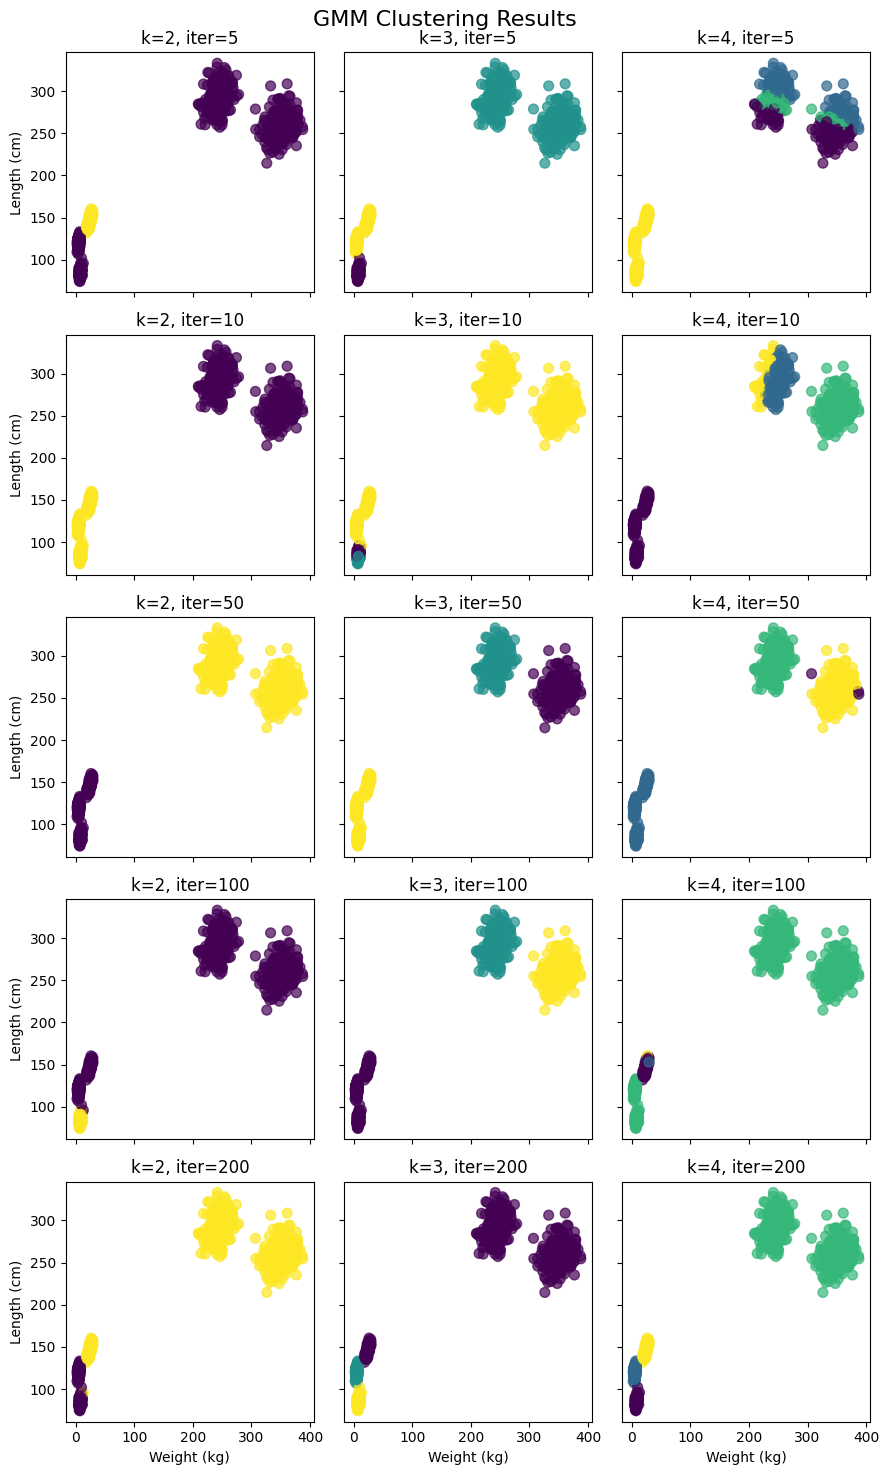

In [11]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows), sharex=True, sharey=True)

for i, iter_count in enumerate(iters_list):
    for j, k_val in enumerate(k_list):
        col_name = f'gmm_k{k_val}_iter{iter_count}'
        ax = axes[i, j]
        scatter = ax.scatter(X[:,0], X[:,1], c=df[col_name], cmap='viridis', s=50, alpha=0.7)
        ax.set_title(f'k={k_val}, iter={iter_count}')
        if i == n_rows-1:
            ax.set_xlabel('Weight (kg)')
        if j == 0:
            ax.set_ylabel('Length (cm)')
fig.suptitle("GMM Clustering Results", fontsize=16)
plt.tight_layout()
plt.show()


# Sklearn - Gaussian Mixture Model (GMM) clustering


In [12]:
for iter_count in iters_list:
    for k_val in k_list:
        gmm = GMM(n_components=k_val, max_iter=iter_count, random_state=42)

        gmm.fit(X)
        clusters = gmm.predict(X)

        # store in unique column
        col_name = f'skl_gmm_k{k_val}_iter{iter_count}'
        df[col_name] = clusters

df.head()

,weight,length,cluster_k2_iter5,cluster_k3_iter5,cluster_k4_iter5,cluster_k2_iter10,cluster_k3_iter10,cluster_k4_iter10,cluster_k2_iter50,cluster_k3_iter50,...,skl_gmm_k4_iter10,skl_gmm_k2_iter50,skl_gmm_k3_iter50,skl_gmm_k4_iter50,skl_gmm_k2_iter100,skl_gmm_k3_iter100,skl_gmm_k4_iter100,skl_gmm_k2_iter200,skl_gmm_k3_iter200,skl_gmm_k4_iter200
0,7.643140,84.411360,0,2,0,0,1,2,1,1,...,3,0,0,3,0,0,3,0,0,3
1,338.079325,259.918982,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,347.303709,225.203959,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,6.758873,87.143065,0,2,0,0,1,2,1,1,...,3,0,0,3,0,0,3,0,0,3
4,25.330695,145.428500,0,2,0,0,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0


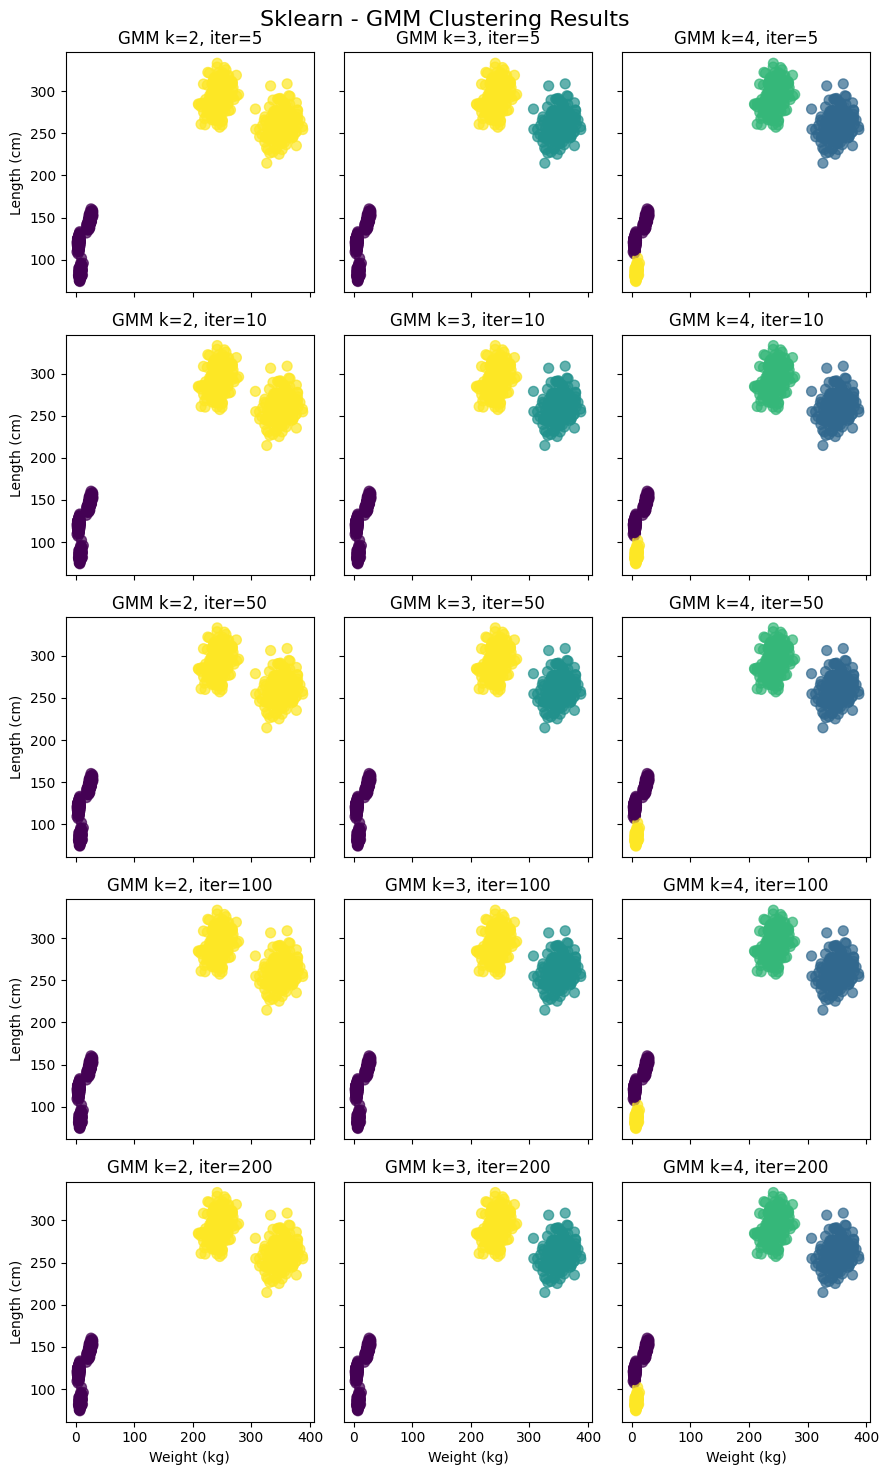

In [13]:
n_rows = len(iters_list)
n_cols = len(k_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows), sharex=True, sharey=True)

for i, iter_count in enumerate(iters_list):
    for j, k_val in enumerate(k_list):
        col_name = f'skl_gmm_k{k_val}_iter{iter_count}'
        ax = axes[i, j]
        ax.scatter(df['weight'], df['length'], c=df[col_name], cmap='viridis', s=50, alpha=0.7)
        ax.set_title(f'GMM k={k_val}, iter={iter_count}')
        if i == n_rows-1:
            ax.set_xlabel('Weight (kg)')
        if j == 0:
            ax.set_ylabel('Length (cm)')
fig.suptitle("Sklearn - GMM Clustering Results", fontsize=16)
plt.tight_layout()
plt.show()


#